# TESTE SEMANTIX - DATA SCIENCE
# LUIZ MENNITI - 29/11/2019
## Questôes respondidas após análise exploratória

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import copy

In [2]:
path = %pwd
file = '/bank-full.csv'
df_bank = pd.DataFrame()
iter_csv = pd.read_csv(path+file, chunksize=100000, sep=';')
print('Reading dataframe dataframe in chunks...')
for pd_csv_chunk in iter_csv:        
    df_bank = pd.concat([df_bank, pd_csv_chunk], ignore_index=True)

Reading dataframe dataframe in chunks...


# Análise exploratória

In [3]:
df_bank.head(5)

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [4]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df_bank.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

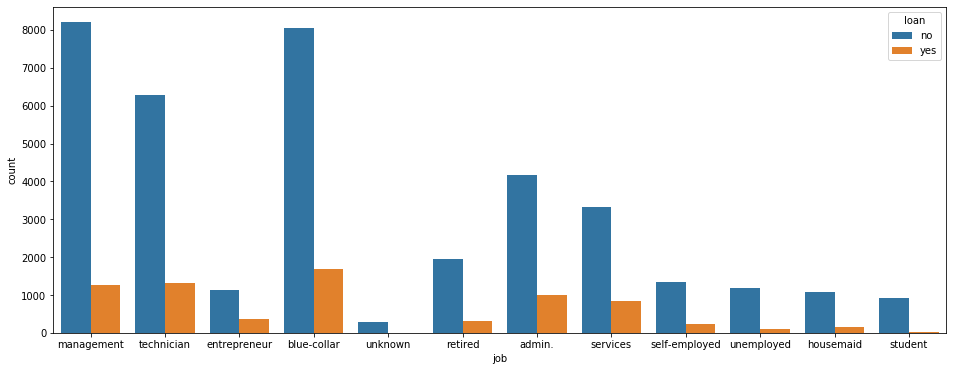

In [6]:
plt.figure(figsize=(16, 6))
sns.countplot(data=df_bank, x='job', hue='loan')

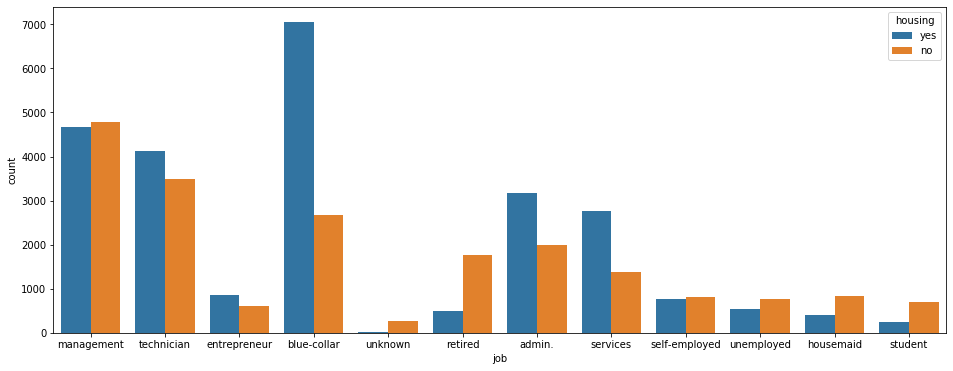

In [7]:
plt.figure(figsize=(16, 6))
sns.countplot(data=df_bank, x='job', hue='housing')

<Figure size 1152x432 with 0 Axes>

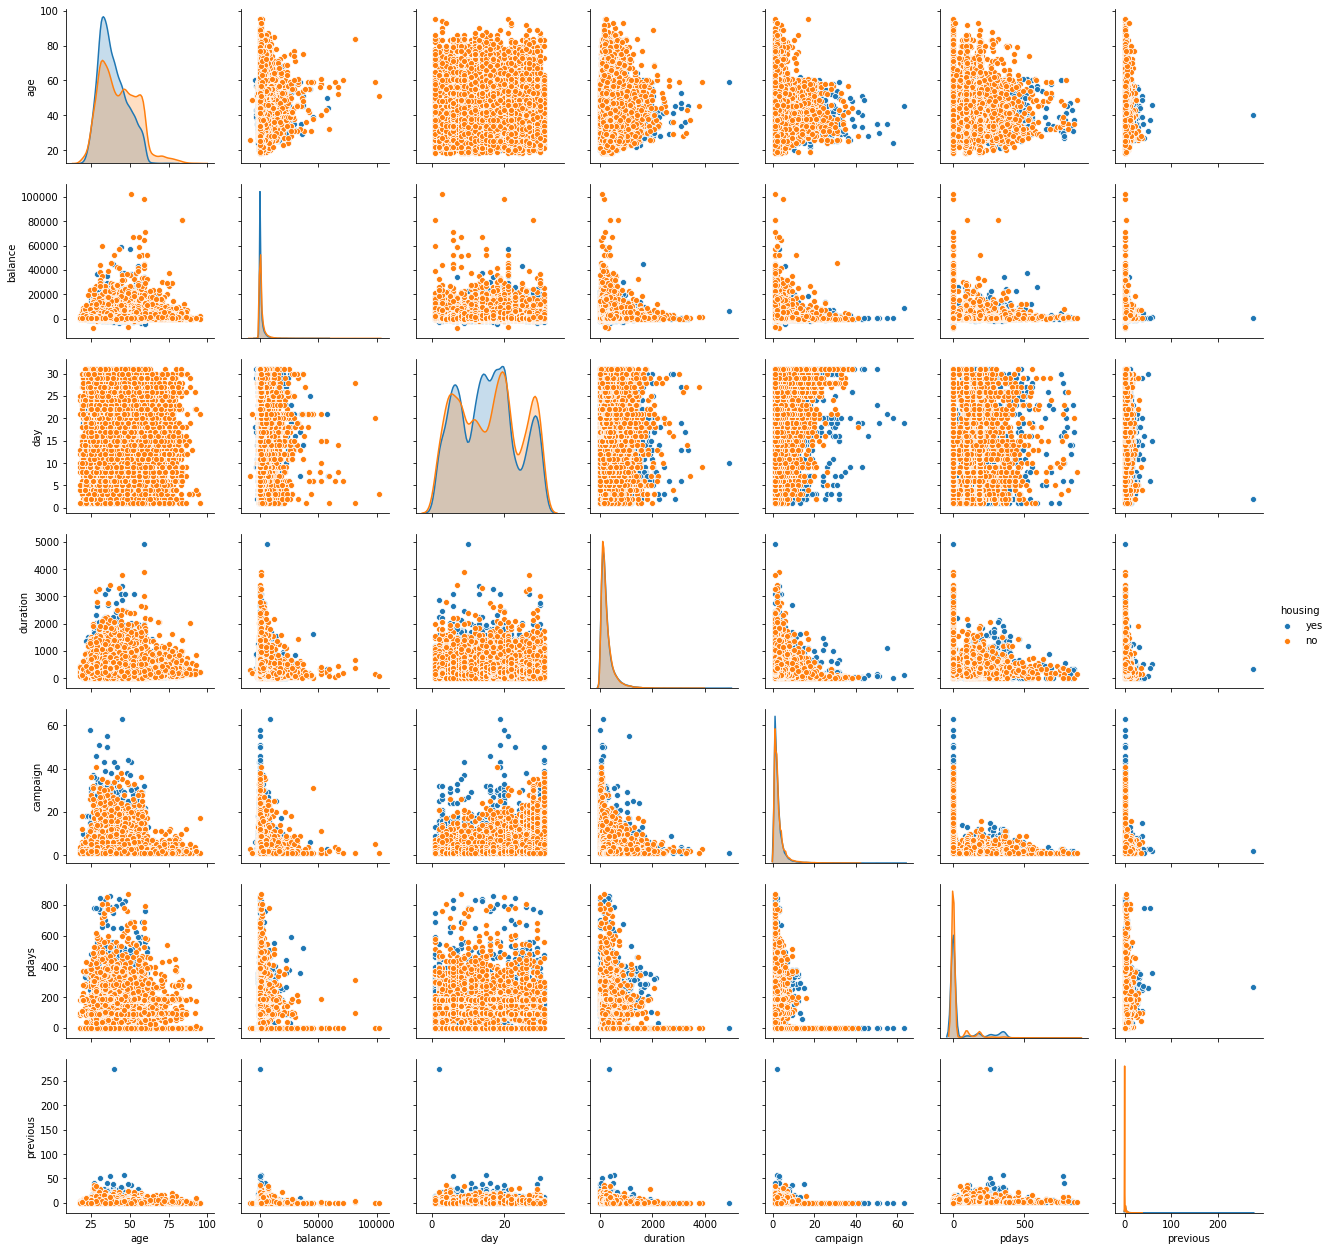

In [8]:
plt.figure(figsize=(16, 6))
g = sns.pairplot(df_bank, hue='housing')

<Figure size 1152x432 with 0 Axes>

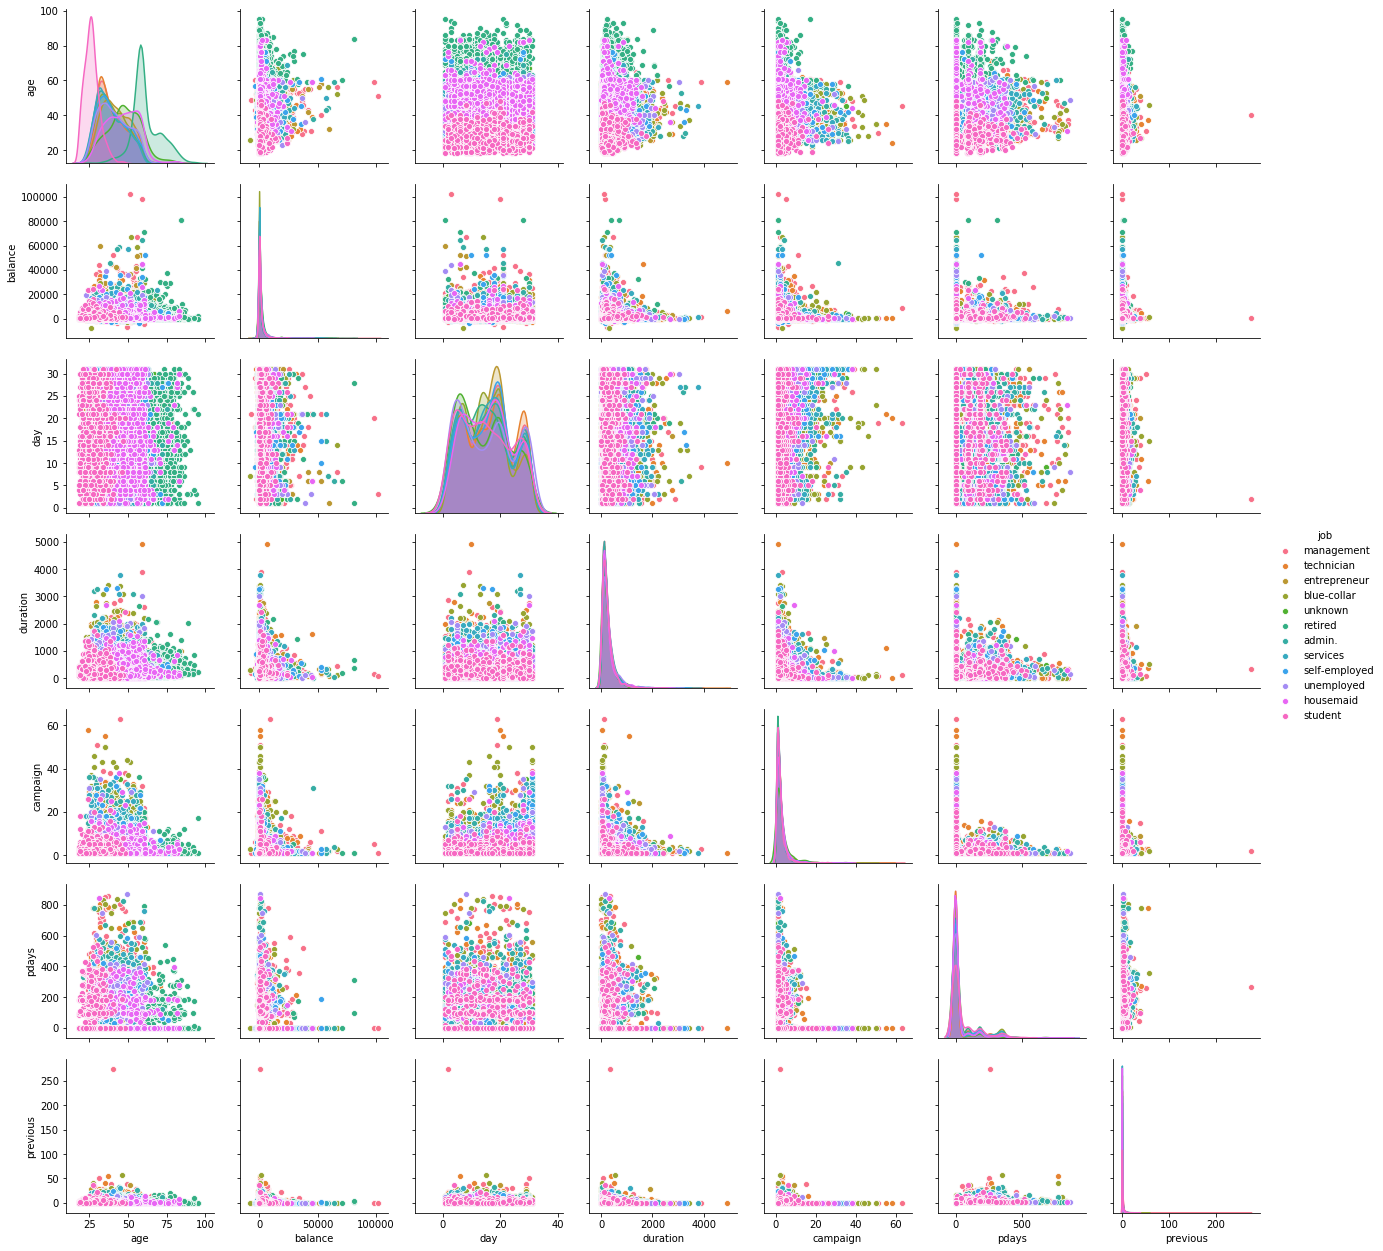

In [9]:
plt.figure(figsize=(16, 6))
g = sns.pairplot(df_bank, hue='job')

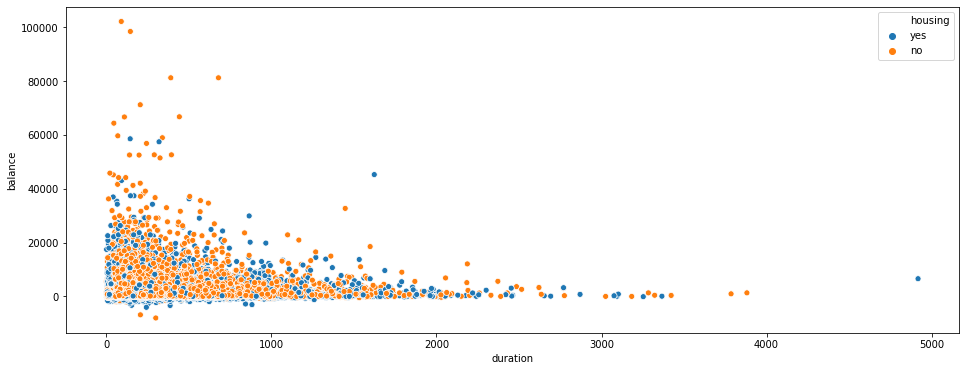

In [10]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x='duration',y='balance', data=df_bank, hue='housing')

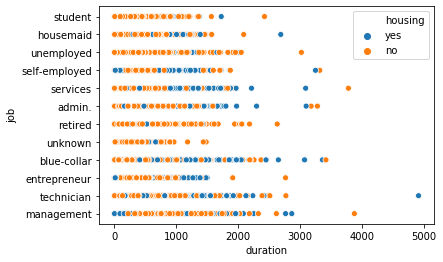

In [11]:
sns.scatterplot(x='duration',y='job', data=df_bank, hue='housing')

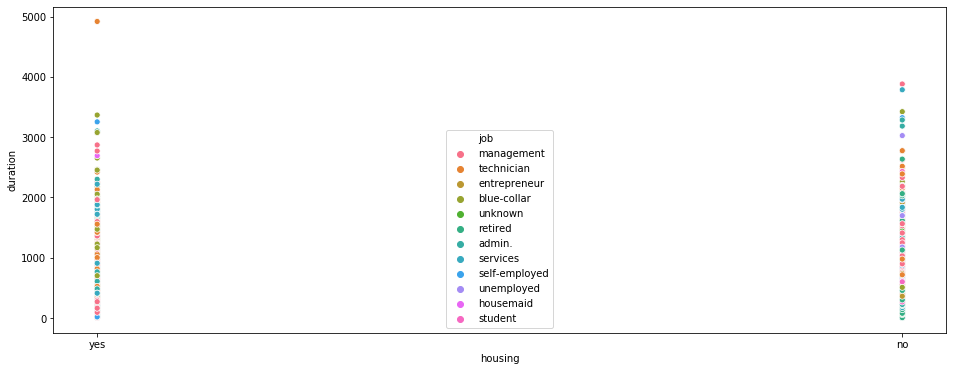

In [12]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x='housing',y='duration', data=df_bank, hue='job')

# Preprocessing

In [13]:
from sklearn import preprocessing

In [14]:
def quantile_classifier(dataframe, column):
    q1 = dataframe[column].quantile(0.25)
    q2 = dataframe[column].quantile(0.50)
    q3 = dataframe[column].quantile(0.75)
    dataframe.loc[(dataframe[column] <= q1), column] = 1
    dataframe.loc[(dataframe[column] > q1) & (dataframe[column] <= q2), column] = 2
    dataframe.loc[(dataframe[column] > q2) & (dataframe[column] <= q3), column] = 3
    dataframe.loc[(dataframe[column] > q3), column] = 4 
    print (q1, q2, q3)
    return dataframe

In [15]:
lbl_encod = preprocessing.LabelEncoder()
df_bank_encod = copy.deepcopy(df_bank)

list_of_columns_encod = ['job', 'marital', 'education', 'default','month', 'housing',
       'loan', 'contact','y']

list_of_columns_quantile = ['age', 'duration']

df_bank_encod['poutcome'].replace(['unknown', 'failure', 'success', 'other'], [1,2,3,4], inplace  = True)

df_bank_encod.loc[(df_bank_encod['pdays'] == 999), 'pdays'] = 1
df_bank_encod.loc[(df_bank_encod['pdays'] > 0) & (df_bank_encod['pdays'] <= 10), 'pdays'] = 2
df_bank_encod.loc[(df_bank_encod['pdays'] > 10) & (df_bank_encod['pdays'] <= 20), 'pdays'] = 3
df_bank_encod.loc[(df_bank_encod['pdays'] > 20) & (df_bank_encod['pdays'] != 999), 'pdays'] = 4 


for column in list_of_columns_encod:
    df_bank_encod[column] = lbl_encod.fit_transform(df_bank_encod[column])

for column in list_of_columns_quantile:
    df_bank_encod = quantile_classifier(df_bank_encod,column)
    
df_bank_encod

33.0 39.0 48.0
103.0 180.0 319.0


age  job  marital  education  default  balance  housing  loan  contact  \
0        4    4        1          2        0     2143        1     0        2   
1        3    9        2          1        0       29        1     0        2   
2        1    2        1          1        0        2        1     1        2   
3        3    1        1          3        0     1506        1     0        2   
4        1   11        2          3        0        1        0     0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
45206    4    9        1          2        0      825        0     0        0   
45207    4    5        0          0        0     1729        0     0        0   
45208    4    5        1          1        0     5715        0     0        0   
45209    4    1        1          1        0      668        0     0        1   
45210    2    2        1          1        0     2971        0     0        0   

       day  month  duration  campaign  pdays  previous  poutcome  y  
0        5      8         3         1     -1         0         1  0  
1        5      8         2         1     -1         0         1  0  
2        5      8         1         1     -1         0         1  0  
3        5      8         1         1     -1         0         1  0  
4        5      8         3         1     -1         0         1  0  
...    ...    ...       ...       ...    ...       ...       ... ..  
45206   17      9         4         3     -1         0         1  1  
45207   17      9         4         2     -1         0         1  1  
45208   17      9         4         5      4         3         3  1  
45209   17      9         4         4     -1         0         1  0  
45210   17      9         4         2      4        11         4  0  

[45211 rows x 17 columns]

In [16]:
corr_loans = df_bank_encod.corr()

In [17]:
corr_loans

age       job   marital  education   default   balance  \
age        1.000000 -0.032314 -0.409601  -0.107392 -0.012400  0.078710   
job       -0.032314  1.000000  0.062045   0.166707 -0.006853  0.018232   
marital   -0.409601  0.062045  1.000000   0.108576 -0.007023  0.002122   
education -0.107392  0.166707  0.108576   1.000000 -0.010718  0.064514   
default   -0.012400 -0.006853 -0.007023  -0.010718  1.000000 -0.066745   
balance    0.078710  0.018232  0.002122   0.064514 -0.066745  1.000000   
housing   -0.145524 -0.125363 -0.016096  -0.090790 -0.006025 -0.068768   
loan       0.001146 -0.033004 -0.046893  -0.048574  0.077234 -0.084350   
contact    0.047412 -0.082063 -0.039201  -0.110928  0.015404 -0.027273   
day       -0.006766  0.022856 -0.005261   0.022671  0.009424  0.004503   
month     -0.030929 -0.092870 -0.006991  -0.057304  0.011486  0.019777   
duration  -0.039418  0.002222  0.017125  -0.004973 -0.006905  0.016749   
campaign   0.014517  0.006839 -0.008994   0.006255  0.016822 -0.014578   
pdays     -0.021499 -0.001702  0.024669   0.032470 -0.039286  0.031073   
previous  -0.008848 -0.000911  0.014973   0.017570 -0.018329  0.016674   
poutcome  -0.026192  0.004017  0.029164   0.031693 -0.034889  0.029639   
y         -0.010920  0.040438  0.045588   0.066241 -0.022419  0.052838   

            housing      loan   contact       day     month  duration  \
age       -0.145524  0.001146  0.047412 -0.006766 -0.030929 -0.039418   
job       -0.125363 -0.033004 -0.082063  0.022856 -0.092870  0.002222   
marital   -0.016096 -0.046893 -0.039201 -0.005261 -0.006991  0.017125   
education -0.090790 -0.048574 -0.110928  0.022671 -0.057304 -0.004973   
default   -0.006025  0.077234  0.015404  0.009424  0.011486 -0.006905   
balance   -0.068768 -0.084350 -0.027273  0.004503  0.019777  0.016749   
housing    1.000000  0.041323  0.188123 -0.027982  0.271481  0.005279   
loan       0.041323  1.000000 -0.010873  0.011370  0.022145 -0.014285   
contact    0.188123 -0.010873  1.000000 -0.027936  0.361145 -0.025920   
day       -0.027982  0.011370 -0.027936  1.000000 -0.006028 -0.057158   
month      0.271481  0.022145  0.361145 -0.006028  1.000000  0.013790   
duration   0.005279 -0.014285 -0.025920 -0.057158  0.013790  1.000000   
campaign  -0.023599  0.009980  0.019614  0.162490 -0.110031 -0.147916   
pdays      0.064780 -0.031448 -0.287584 -0.085605  0.033911  0.031327   
previous   0.037076 -0.011043 -0.147811 -0.051710  0.022727  0.015789   
poutcome   0.033143 -0.035199 -0.247246 -0.071823  0.021791  0.036020   
y         -0.139173 -0.068185 -0.148395 -0.028348 -0.024471  0.316413   

           campaign     pdays  previous  poutcome         y  
age        0.014517 -0.021499 -0.008848 -0.026192 -0.010920  
job        0.006839 -0.001702 -0.000911  0.004017  0.040438  
marital   -0.008994  0.024669  0.014973  0.029164  0.045588  
education  0.006255  0.032470  0.017570  0.031693  0.066241  
default    0.016822 -0.039286 -0.018329 -0.034889 -0.022419  
balance   -0.014578  0.031073  0.016674  0.029639  0.052838  
housing   -0.023599  0.064780  0.037076  0.033143 -0.139173  
loan       0.009980 -0.031448 -0.011043 -0.035199 -0.068185  
contact    0.019614 -0.287584 -0.147811 -0.247246 -0.148395  
day        0.162490 -0.085605 -0.051710 -0.071823 -0.028348  
month     -0.110031  0.033911  0.022727  0.021791 -0.024471  
duration  -0.147916  0.031327  0.015789  0.036020  0.316413  
campaign   1.000000 -0.108033 -0.032855 -0.083184 -0.073172  
pdays     -0.108033  1.000000  0.532318  0.866869  0.167929  
previous  -0.032855  0.532318  1.000000  0.503637  0.093236  
poutcome  -0.083184  0.866869  0.503637  1.000000  0.183468  
y         -0.073172  0.167929  0.093236  0.183468  1.000000

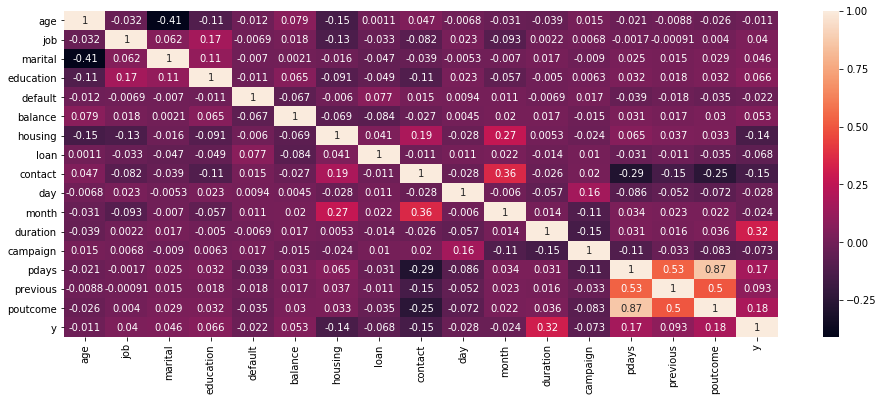

In [18]:
plt.figure(figsize=(16, 6))
sns.heatmap(data=corr_loans, annot=True)

# Questões

### Q1


De acordo com os gráficos da análise exploratória, Blue Collar e Management tem uma maior taxa de pedidos de empréstimos mobiliários na faixa de 7000 e 4800 aproximadamente. Para empréstimos pessoais, Blue Collar, Technician e Management também dominam essa área com aproximadamente 1700, 1300 e 1200 para ambos.

Após executar Regressão Linear 1, Regressão Linear 2, SVM e SVM com GridSearch.

É possível concluir nenhum dos modelos teve um resultado muito satisfatório, porém para o GridSearch tivemos um modelo classificatório com precisão de 0.28 para o Blue-collar, 0.24 para Management. O que é considerado pobre, tendo a necessidade de melhorar o modelo.
Tivemos um Recall acima de 0.5 para Blue Collar, o que é um número aceitável, e para management 0.46, considerando um número regular. Para positivos verdadeiros.
Com um F1-Score sendo 0.41 e 0.32, tendo uma qualidade no modelo mediana baixa.


blue-collar:

* precision: 0.28    
* recall: 0.77
* f1-score: 0.41   
* support: 2962
                          
management:       
* precision: 0.24
* recall: 0.46
* f1-score: 0.32
* support: 2811

# Split dados de teste [1]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
y = df_bank_encod['housing']
list_of_columns = df_bank_encod.columns.to_list()
list_of_columns.remove('housing')
X = df_bank_encod[list_of_columns]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Análise Regressão Linear [1]

In [22]:
from sklearn.linear_model import LinearRegression

## Treinando o modelo [1]

In [23]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-7.58259955e-02 -1.25889397e-02 -5.83692612e-02 -3.23396625e-02
 -6.47092842e-02 -8.06251094e-06  2.63557316e-02  6.58519832e-02
 -8.65092945e-04  3.39787817e-02  1.56955000e-02  1.28850092e-03
  4.33797215e-02  1.73138201e-03 -4.55176464e-02 -2.07452844e-01]


In [24]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

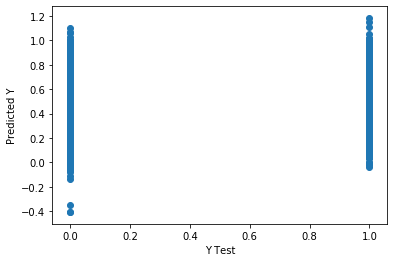

In [25]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Avaliando o modelo [1]

In [26]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.41997895356487924
MSE: 0.21037369988457147
RMSE: 0.4586651282630624


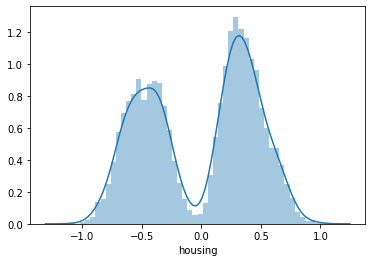

In [27]:
sns.distplot((y_test-predictions),bins=50);

In [28]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

Coeffecient
age          -0.075826
job          -0.012589
marital      -0.058369
education    -0.032340
default      -0.064709
balance      -0.000008
loan          0.026356
contact       0.065852
day          -0.000865
month         0.033979
duration      0.015695
campaign      0.001289
pdays         0.043380
previous      0.001731
poutcome     -0.045518
y            -0.207453

# Split dados de teste [2]


In [29]:
y = df_bank_encod['loan']
list_of_columns = df_bank_encod.columns.to_list()
list_of_columns.remove('loan')
X = df_bank_encod[list_of_columns]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Análise Regressão Linear [2]
## Treinando modelo [2]

In [31]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-3.20240452e-03 -1.98393564e-03 -2.50742701e-02 -1.69016261e-02
  1.83495168e-01 -8.91897256e-06  1.65566883e-02 -2.32349822e-02
  1.05648661e-04  3.66307941e-03  1.29480967e-03  3.20002541e-04
 -4.27308108e-03  4.02915246e-04 -8.52710573e-03 -6.18857812e-02]


In [32]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

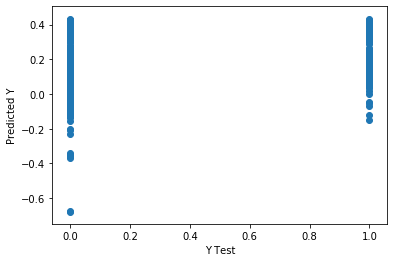

In [33]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Avaliando modelo [2]

In [34]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.2637674592191269
MSE: 0.13194609300099516
RMSE: 0.36324384785016683


In [35]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

Coeffecient
age          -0.003202
job          -0.001984
marital      -0.025074
education    -0.016902
default       0.183495
balance      -0.000009
housing       0.016557
contact      -0.023235
day           0.000106
month         0.003663
duration      0.001295
campaign      0.000320
pdays        -0.004273
previous      0.000403
poutcome     -0.008527
y            -0.061886

# Support Vector Machines

In [36]:
lbl_encod_2 = preprocessing.LabelEncoder()
df_bank_encod2 = copy.deepcopy(df_bank)

list_of_columns_encod2 = ['housing','loan']

for column in list_of_columns_encod2:
    df_bank_encod2[column] = lbl_encod_2.fit_transform(df_bank_encod2[column])

<Figure size 1152x432 with 0 Axes>

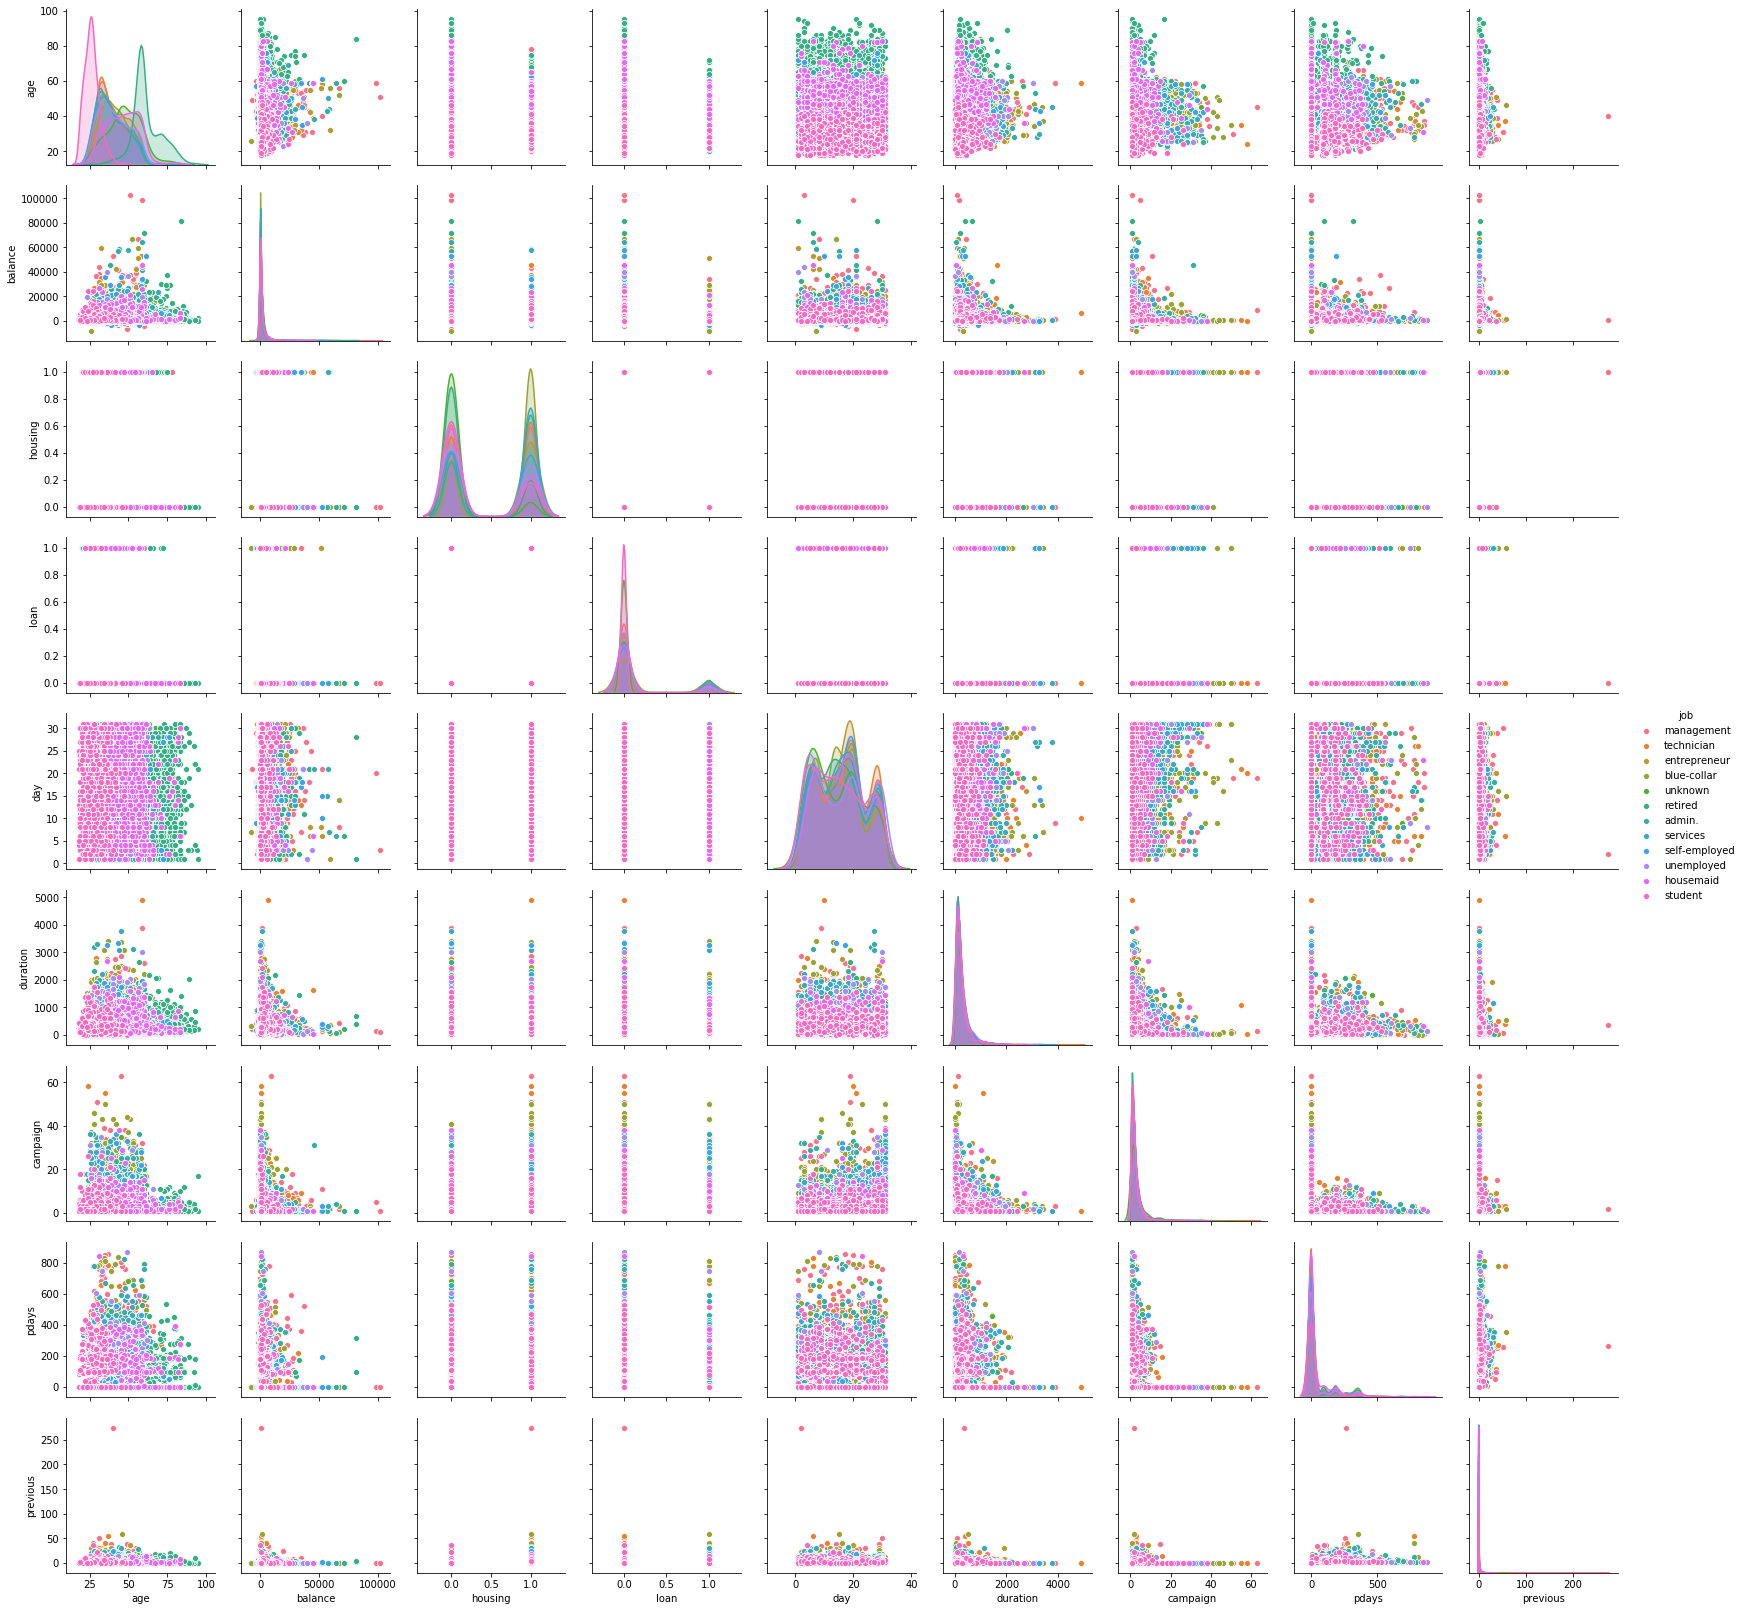

In [37]:
plt.figure(figsize=(16, 6))
g = sns.pairplot(df_bank_encod2, hue='job')

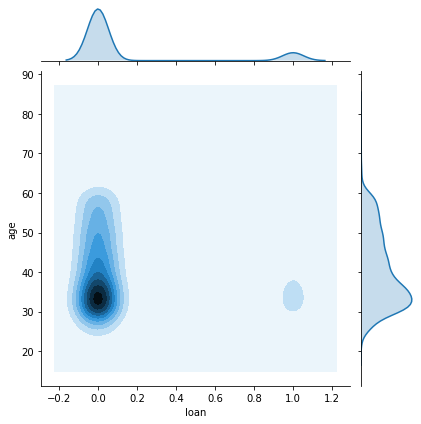

In [38]:
managementData = df_bank_encod2[df_bank_encod2['job']=='management']
sns.jointplot(x='loan', y='age', data=managementData, kind='kde')

## Treinando Modelo

In [39]:
from sklearn.svm import SVC

In [40]:
model = SVC(gamma='auto')

In [41]:
X = df_bank_encod2[['housing', 'loan']]
y = df_bank_encod2['job']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [43]:
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
from sklearn.metrics import confusion_matrix, classification_report

In [45]:
predictions = model.predict(X_test)

In [46]:
print(confusion_matrix(y_test, predictions))

[[   0 1034    0    0  492    0    0    0    0    0    0    0]
 [   0 2293    0    0  669    0    0    0    0    0    0    0]
 [   0  323    0    0  144    0    0    0    0    0    0    0]
 [   0  128    0    0  225    0    0    0    0    0    0    0]
 [   0 1529    0    0 1282    0    0    0    0    0    0    0]
 [   0  214    0    0  451    0    0    0    0    0    0    0]
 [   0  266    0    0  226    0    0    0    0    0    0    0]
 [   0  908    0    0  346    0    0    0    0    0    0    0]
 [   0   71    0    0  212    0    0    0    0    0    0    0]
 [   0 1352    0    0  894    0    0    0    0    0    0    0]
 [   0  190    0    0  232    0    0    0    0    0    0    0]
 [   0    3    0    0   80    0    0    0    0    0    0    0]]


In [47]:
print(classification_report(y_test, predictions))

/home/menniti/anaconda3/envs/semantix/lib/python3.8/site-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,


               precision    recall  f1-score   support

       admin.       0.00      0.00      0.00      1526
  blue-collar       0.28      0.77      0.41      2962
 entrepreneur       0.00      0.00      0.00       467
    housemaid       0.00      0.00      0.00       353
   management       0.24      0.46      0.32      2811
      retired       0.00      0.00      0.00       665
self-employed       0.00      0.00      0.00       492
     services       0.00      0.00      0.00      1254
      student       0.00      0.00      0.00       283
   technician       0.00      0.00      0.00      2246
   unemployed       0.00      0.00      0.00       422
      unknown       0.00      0.00      0.00        83

     accuracy                           0.26     13564
    macro avg       0.04      0.10      0.06     13564
 weighted avg       0.11      0.26      0.15     13564



## Prática do Gridsearch 

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
param_grid = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1,0.1, 0.01, 0.001, 0.0001], 'kernel':['rbf']}

In [50]:
grid = GridSearchCV(SVC(),param_grid, n_jobs=4, refit=True, verbose=3)

In [ ]:
grid.fit(X_train, y_train)

/home/menniti/anaconda3/envs/semantix/lib/python3.8/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  8.8min


In [ ]:
grid.best_estimator_

In [ ]:
predictions = grid.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
print(confusion_matrix(y_test, predictions))

### Q2
Analisando a matriz de correlação entre a coluna 'poutcome' vs 'campaing', temos uma correlação de -0,083 mostrando que não existe relação direta entre elas. Já o 'poutcome' vs 'previous', temos uma correlação de 0.5 demostrando uma correlação significativa entre os eventos.


In [ ]:
plt.figure(figsize=(16, 6))
sns.countplot(data=df_bank, x='previous', hue='poutcome')

Além disso, é possível verificar que muitos dados estão caracterizados como 'unknown', o que é bem ruim uma vez que não é possível visualizar corretamente.

In [ ]:
plt.figure(figsize=(16, 6))
dfData = df_bank[df_bank['poutcome']!='unknown']
sns.countplot(data=dfData, x='previous', hue='poutcome')

In [ ]:
result = (dfData['poutcome'][dfData['poutcome']=='success'].count() / dfData['poutcome'].count())*100

In [ ]:
result

Analisando o gráfico 'previous' vs 'poutcome', filtrado sem os dados unknown é mais fácil perceber que existe uma taxa de conversão de 18,31% nas campanhas que foram feitas anteriormente.

### Q3
De acordo com os dados abaixo, existem 1511 eventos bem sucedidos onde foram realizados calls com sucesso. A média de ligações para eventos bem sucedidos é ~3, e o número máximo de ligações chegou a 28. Portanto o mais indicado é manter nessa faixa de ligações evitando esforços desnecessários. Outro fator importante, é que analisando pela eficiência de cada ligações 'success' vs 'failure', 10, 14 e 8 ligações estão na faixa de 50 a 70% de eficiência. No entanto é preciso ficar atendo a quantidade de eventos que ocorreram para não termos dados enviesados ou com poucas amostras.

In [ ]:
dfData['poutcome'][dfData['poutcome']=='success'].describe()

In [ ]:
dfData['previous'][dfData['poutcome']=='success'].describe()

In [ ]:
sns.countplot(data=dfData, x='poutcome')

In [ ]:
df_result = dfData.groupby(['poutcome','previous'])['previous'].count()

In [ ]:
i = 1
array_of_results = [[],[],[],[]]
for success_result in df_result['success']:
    try:
        array_of_results[3].append(df_result['success'][i]/df_result['failure'][i])
        array_of_results[0].append(i)
        array_of_results[2].append(df_result['failure'][i])
        array_of_results[1].append(df_result['success'][i])
    except:
        i = i+1
        continue
    i = i+1
df_of_results = pd.DataFrame(columns=['Number_calls', 'Count Success', 'Count Failure', 'Efficiency'])

In [ ]:
df_of_results['Number_calls']=array_of_results[0]
df_of_results['Count Success']=array_of_results[1]
df_of_results['Count Failure']=array_of_results[2]
df_of_results['Efficiency']=array_of_results[3]

In [ ]:
df_of_results.sort_values('Efficiency', ascending=False)

### Q4
De acordo com a matriz de correlação, não existe nenhuma relação entre as campanhas. O valor da correlação é de -0.033, indicando que não existe nenhuma relevância entre elas.

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(data=corr_loans, annot=True)

### Q5
Não existe nenhuma evidência direta nos dados que garanta a exigência dos bancos para efetuar um seguro de crédito. Nos dados em nenhum momento é mencionado seguro de crédito, apenas termos de depósito que é um instrumento financeiro com objetivo de pagar juros em cima do depósito efetuado pelo investidor. O ponto mais próximo para mitigar riscos na hora de efetuar empréstimos é efetuar uma análise para identificar se o cliente já têm algum empréstimo pessoal ou habitacional em andamento. Além de verificar se ele está com dificuldades para efetuar os pagamentos das parcelas (default). Felizmente de acordo com os gráficos abaixo, existem poucas pessoas que estão em default, permitindo que o banco faça empréstimos com um risco mitigado.

In [ ]:
plt.figure(figsize=(16, 6))
sns.countplot(data=dfData, x='default', hue='job')

In [ ]:
plt.figure(figsize=(16, 6))
sns.countplot(data=dfData, x='loan', hue='job')

In [ ]:
plt.figure(figsize=(16, 6))
sns.countplot(data=dfData, x='housing', hue='job')

### Q6
De acordo com os gráficos, pessoas na faixa de 30 até 45 anos têm predominância de empréstimos para casa (Housing), pessoas até 30 anos têm sua maioria de solteiros que fazem um Housing e a maior parte dessa faixa são estudantes. Entre 30 e 45, estão pessoas casadas e divorciadas, além de terem diversas profissões como gerente, trabalhadores manuais, administradores, empreendedores e etc. Acima de 45 anos de idade temos pessoas que estão aposentadas apenas.

Outro ponto a ser considerado são é que não existe muita diferença entre na perspectiva de educação com as pessoas que fazem empréstimos imobiliários. Todas estão na faixa de 35 a 40 anos.

Outra característica, são os os balanços que estão com média de 1296 U$, com número médio de ligações igual a 2.

In [ ]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x='age',y='duration', data=df_bank, hue='housing')

In [ ]:
plt.figure(figsize=(16, 6))
sns.barplot(x='job', y='age', data=df_bank, hue='housing')

In [ ]:
plt.figure(figsize=(16, 6))
sns.barplot(x='marital', y='age', data=df_bank, hue='housing')

In [ ]:
plt.figure(figsize=(16, 6))
sns.barplot(x='education', y='age', data=df_bank, hue='housing')

In [ ]:
dfData[dfData['housing']=='yes'].describe()